Chap3 EX

In [15]:
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

## 1. An MNIST Classifier With Over 97% Accuracy

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
mnist = fetch_openml('mnist_784', version = 1, as_frame=False)

In [25]:
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [26]:
knn_clf = KNeighborsClassifier()

param_grid = [{'weights':["uniform", "distance"],
              'n_neighbors':[3,4,5]}]
grid_search = GridSearchCV(knn_clf,param_grid,cv=5,verbose=3)

In [27]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  21.3s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  19.4s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  19.8s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  32.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  19.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  19.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  19.3s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  17.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  16.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  16.9s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  19.9s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [29]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [30]:
grid_search.best_score_

0.9716166666666666

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = grid_search.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9714

## 2. Data Augmentation

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shif‐ted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.5

## 3. Tackle the Titanic dataset

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

In [36]:
train_data = pd.read_csv('../data/titanic_train.csv')
test_data = pd.read_csv('../data/titanic_test.csv')

In [38]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The **Age**, **Cabin** and **Embarked** attributes are sometimes null (less than 891 non-null), especially the **Cabin** (77% are null):
    
- We will ignore the **Cabin** for now and focus on the rest.
- The **Age** attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable.

The **Name** and **Ticket** attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [40]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [44]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [45]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

**Note**: the code below uses a mix of `Pipeline`, `FeatureUnion` and a custom `DataFrameSelector` to preprocess some columns differently.  Since Scikit-Learn 0.20, it is preferable to use a `ColumnTransformer`, like in the previous chapter.

Now let's build our preprocessing pipelines. We will reuse the `DataframeSelector` we built in the previous chapter to select specific attributes from the `DataFrame`:

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

In [47]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names]

In [48]:
# Make pipeline:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [49]:
num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch","Fare"])),
    ("imputer", SimpleImputer(strategy="median")),
])

In [50]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [52]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index = X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass","Sex","Embarked"])),
    ("imputer",MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [57]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [59]:
# Join the numerical and categorical piplines:
from sklearn.pipeline import FeatureUnion

In [60]:
preprocess_pipeline = FeatureUnion(
    transformer_list=[
        ("num_pipeline",num_pipeline),
        ("cat_pipeline",cat_pipeline)
])

In [61]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [63]:
y_train = train_data["Survived"]

In [64]:
from sklearn.svm import SVC

In [65]:
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [67]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
svm_scores = cross_val_score(svm_clf, X_train, y_train,cv=10)

In [70]:
svm_scores.mean()

0.7329588014981274

better than random but not great choice, intro`RandomForest`

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train,cv=10)
forest_scores.mean()

0.8126466916354558

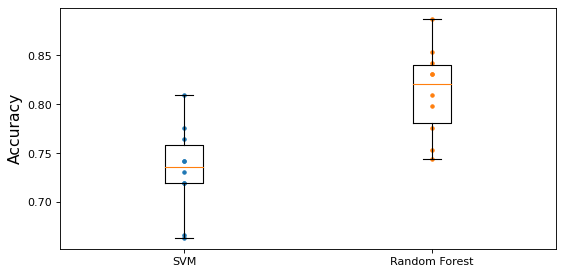

In [78]:
_,ax = plt.subplots(figsize=(8,4),dpi=80)
ax.plot([1] * 10,svm_scores, ".")
ax.plot([2] * 10,forest_scores, ".")
ax.boxplot([svm_scores, forest_scores],labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [80]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [81]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
